# Complete Loan Prediction Project
## Financial Credit Scoring & Fairness Auditing

This notebook implements the complete project including:
- Part A: CRISP-DM Project Design, Data Acquisition & Wrangling
- Part B: Model Development, Evaluation, and Deployment


## PART A: CRISP-DM Project Design, Data Acquisition & Wrangling

### 1. Frame your problem using CRISP-DM stages

**Problem Statement:**
Build a credit-worthiness prediction model for loan applications that:
- Predicts loan approval/rejection (Loan_Status)
- Conducts fairness analysis to identify potential bias
- Ensures compliance with data protection regulations

**CRISP-DM Framework:**
- **Business Understanding**: Automate and improve loan approval decisions
- **Data Understanding**: Loan application data with demographics and financial info
- **Data Preparation**: Handle missing values, feature engineering
- **Modeling**: Classification models (Logistic Regression, Random Forest, XGBoost, Neural Network)
- **Evaluation**: Performance metrics and fairness analysis
- **Deployment**: FastAPI + Streamlit UI

**a) Research Hypotheses:**
- **H0 (Null)**: No significant relationship between applicant characteristics and loan approval status
- **H1 (Alternative)**: There is a significant relationship between applicant characteristics and loan approval status
- **H0_fair**: The model shows no disparate impact across protected attributes (Gender, Property_Area)
- **H1_fair**: The model shows significant bias/disparate impact across protected attributes

**b) Variables:**
- **Dependent Variable**: `Loan_Status` (Y/N) - Loan approval status
- **Independent Variables**:
  - Demographic: Gender, Married, Dependents, Education, Self_Employed
  - Financial: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
  - Credit: Credit_History
  - Property: Property_Area
- **Protected Attributes** (for fairness analysis): Gender, Property_Area

**c) Populations, Samples, Experimental Design:**
- **Population**: All loan applicants to the financial institution
- **Sample**: 502 loan application records (historical data)
- **Experimental Design**: Observational study using historical loan application data
  - No randomization (historical data)
  - Potential for selection bias
  - Need for fairness auditing to ensure equitable treatment


In [5]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/549.1 kB ? eta -:--:--
   ------------------------------------ - 524.3/549.1 kB 412.9 kB/s eta 0:00:01
   ---------------------------------------- 549.1/549.1 kB 411.5 kB/s  0:00:01
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.9 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.9 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.9 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.9 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.9 MB 791.6 kB/s 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import os
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, f1_score, precision_score, recall_score, 
                            mean_squared_error)
from xgboost import XGBClassifier
# Simple experiment tracking (replaces MLflow)
from experiment_tracker import set_experiment, start_run_context, log_params, log_metrics
import shap
from lime import lime_tabular

warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize experiment tracking
set_experiment("Loan_Prediction_Experiment")

print("Libraries imported successfully!")
print("Experiment tracking initialized!")


Experiment 'Loan_Prediction_Experiment' initialized!
Libraries imported successfully!
Experiment tracking initialized!


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Source or simulate a dataset suitable for the chosen scenario

**Dataset Documentation:**
- Source: Banking/Microfinance loan application data
- Structure: Historical loan application records
- Volume: 502 records with 14 features
- Format: CSV file (df1_loan.csv)


In [16]:
# Load the dataset
df = pd.read_csv('df1_loan.csv')

print("="*60)
print("DATA IMPORTATION")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()


DATA IMPORTATION

Dataset Shape: (500, 15)
Total Records: 500
Total Features: 15

Column Names:
['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Total_Income']

First few rows:


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [17]:
# Dataset Structure Documentation
print("="*60)
print("DATASET STRUCTURE DOCUMENTATION")
print("="*60)

print(f"\n1. VOLUME:")
print(f"   - Total Records: {len(df)}")
print(f"   - Total Features: {len(df.columns)}")
print(f"   - Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. DATA TYPES:")
print(df.dtypes)

print(f"\n3. INCONSISTENCIES:")
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_pct.values
})
print("\nMissing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

# Check for inconsistent values
print("\nCategorical Value Checks:")
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    if col in df.columns:
        print(f"  {col}: {df[col].unique()}")

print(f"\n4. PRIVACY RISKS:")
print("   - Loan_ID: Anonymized identifier (low risk)")
print("   - No direct PII (names, addresses, phone numbers)")
print("   - Demographic data aggregated for analysis")
print("   - Financial data anonymized")


DATASET STRUCTURE DOCUMENTATION

1. VOLUME:
   - Total Records: 500
   - Total Features: 15
   - Memory Usage: 0.25 MB

2. DATA TYPES:
Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

3. INCONSISTENCIES:

Missing Values:
              Column  Missing Count  Missing Percentage
2             Gender              9                 1.8
3            Married              3                 0.6
4         Dependents             12                 2.4
6      Self_Employed             27                 5.4
9         LoanAmount             18                 3.6
10  Loan_Amount_Term             14       

### 3. Demonstrate compliance with Uganda Data Protection Act + GDPR principles

**Data Minimization:**
- Only necessary features for credit scoring are retained
- Loan_ID removed (not needed for modeling)
- Total_Income can be derived from ApplicantIncome + CoapplicantIncome

**De-identification:**
- Loan_ID is anonymized (no PII)
- No names, addresses, or direct identifiers present
- Demographic data aggregated for analysis

**Consent Considerations:**
- Data used for research/educational purposes
- Simulated/anonymized dataset
- No real personal data exposed

**Storage & Access Governance:**
- Data stored locally in secure environment
- Access restricted to authorized personnel
- Data encryption recommended for production
- Regular audits for data access logs


In [18]:
# Create a copy for cleaning
df_clean = df.copy()

# Remove unnecessary columns (Data Minimization)
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop('Unnamed: 0', axis=1)
if 'Loan_ID' in df_clean.columns:
    df_clean = df_clean.drop('Loan_ID', axis=1)  # De-identification: Remove identifier

print("="*60)
print("DATA WRANGLING AND PREPROCESSING")
print("="*60)
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")


DATA WRANGLING AND PREPROCESSING

Original shape: (500, 15)
Cleaned shape: (500, 13)


In [19]:
# Handle Missing Values
print("\nHandling missing values...")

# Categorical columns - fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
        df_clean[col] = df_clean[col].fillna(mode_value)
        print(f"  {col}: Filled {df_clean[col].isnull().sum()} missing with mode: {mode_value}")

# Credit_History - fill with mode
if 'Credit_History' in df_clean.columns and df_clean['Credit_History'].isnull().sum() > 0:
    mode_value = df_clean['Credit_History'].mode()[0] if len(df_clean['Credit_History'].mode()) > 0 else 1.0
    df_clean['Credit_History'] = df_clean['Credit_History'].fillna(mode_value)
    print(f"  Credit_History: Filled missing with mode: {mode_value}")

# Numerical columns - fill with median
if 'LoanAmount' in df_clean.columns and df_clean['LoanAmount'].isnull().sum() > 0:
    median_value = df_clean['LoanAmount'].median()
    df_clean['LoanAmount'] = df_clean['LoanAmount'].fillna(median_value)
    print(f"  LoanAmount: Filled missing with median: {median_value:.2f}")

# Loan_Amount_Term - fill with mode
if 'Loan_Amount_Term' in df_clean.columns and df_clean['Loan_Amount_Term'].isnull().sum() > 0:
    mode_value = df_clean['Loan_Amount_Term'].mode()[0] if len(df_clean['Loan_Amount_Term'].mode()) > 0 else 360
    df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(mode_value)
    print(f"  Loan_Amount_Term: Filled missing with mode: {mode_value}")

# CoapplicantIncome - fill with 0 (no co-applicant)
if 'CoapplicantIncome' in df_clean.columns and df_clean['CoapplicantIncome'].isnull().sum() > 0:
    df_clean['CoapplicantIncome'] = df_clean['CoapplicantIncome'].fillna(0)
    print(f"  CoapplicantIncome: Filled missing with 0")

print(f"\nMissing values after handling: {df_clean.isnull().sum().sum()}")



Handling missing values...
  Gender: Filled 0 missing with mode: Male
  Married: Filled 0 missing with mode: Yes
  Dependents: Filled 0 missing with mode: 0
  Self_Employed: Filled 0 missing with mode: No
  Credit_History: Filled missing with mode: 1.0
  LoanAmount: Filled missing with median: 126.50
  Loan_Amount_Term: Filled missing with mode: 360.0

Missing values after handling: 0


In [20]:
# Handle Outliers using IQR method
print("\nHandling outliers using IQR method...")

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df, outliers_count

# Cap outliers in income and loan amount columns
outlier_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in outlier_cols:
    if col in df_clean.columns:
        df_clean, outliers = cap_outliers(df_clean, col)
        print(f"  {col}: Capped {outliers} outliers")

print("Outlier handling completed!")



Handling outliers using IQR method...
  ApplicantIncome: Capped 41 outliers
  CoapplicantIncome: Capped 15 outliers
  LoanAmount: Capped 38 outliers
Outlier handling completed!


In [21]:
# Feature Engineering
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# 1. Total Income
df_clean['Total_Income_Calculated'] = df_clean['ApplicantIncome'] + df_clean['CoapplicantIncome']
print("1. Total_Income_Calculated: ApplicantIncome + CoapplicantIncome")

# 2. Income to Loan Ratio (important for creditworthiness)
df_clean['Income_to_Loan_Ratio'] = df_clean['Total_Income_Calculated'] / (df_clean['LoanAmount'] + 1)
print("2. Income_to_Loan_Ratio: Total_Income / LoanAmount")

# 3. Monthly Income
df_clean['Monthly_Income'] = df_clean['Total_Income_Calculated'] / 12
print("3. Monthly_Income: Total_Income / 12")

# 4. Monthly Loan Payment
df_clean['Monthly_Loan_Payment'] = df_clean['LoanAmount'] / df_clean['Loan_Amount_Term']
print("4. Monthly_Loan_Payment: LoanAmount / Loan_Amount_Term")

# 5. Debt to Income Ratio
df_clean['Debt_to_Income_Ratio'] = df_clean['Monthly_Loan_Payment'] / (df_clean['Monthly_Income'] + 1)
print("5. Debt_to_Income_Ratio: Monthly_Loan_Payment / Monthly_Income")

# 6. Dependents as numeric
df_clean['Dependents_Num'] = df_clean['Dependents'].replace('3+', '3').astype(float)
print("6. Dependents_Num: Converted Dependents to numeric")

# 7. Has Coapplicant
df_clean['Has_Coapplicant'] = (df_clean['CoapplicantIncome'] > 0).astype(int)
print("7. Has_Coapplicant: Binary indicator for coapplicant")

# 8. High Income
median_income = df_clean['Total_Income_Calculated'].median()
df_clean['High_Income'] = (df_clean['Total_Income_Calculated'] > median_income).astype(int)
print(f"8. High_Income: Income above median ({median_income:.2f})")

# Log transformations for skewed features
df_clean['ApplicantIncome_Log'] = np.log1p(df_clean['ApplicantIncome'])
df_clean['CoapplicantIncome_Log'] = np.log1p(df_clean['CoapplicantIncome'])
df_clean['LoanAmount_Log'] = np.log1p(df_clean['LoanAmount'])
df_clean['Total_Income_Log'] = np.log1p(df_clean['Total_Income_Calculated'])
print("\nLog transformations applied to income and loan amount features")

# Remove Total_Income if it exists (we have Total_Income_Calculated)
if 'Total_Income' in df_clean.columns:
    df_clean = df_clean.drop('Total_Income', axis=1)

print(f"\nTotal features after engineering: {len(df_clean.columns)}")
print(f"New features created: 8 engineered + 4 log transforms = 12 new features")



FEATURE ENGINEERING
1. Total_Income_Calculated: ApplicantIncome + CoapplicantIncome
2. Income_to_Loan_Ratio: Total_Income / LoanAmount
3. Monthly_Income: Total_Income / 12
4. Monthly_Loan_Payment: LoanAmount / Loan_Amount_Term
5. Debt_to_Income_Ratio: Monthly_Loan_Payment / Monthly_Income
6. Dependents_Num: Converted Dependents to numeric
7. Has_Coapplicant: Binary indicator for coapplicant
8. High_Income: Income above median (5332.50)

Log transformations applied to income and loan amount features

Total features after engineering: 24
New features created: 8 engineered + 4 log transforms = 12 new features


In [22]:
# Save clean dataset (using generic name as per requirements)
df_clean.to_csv('Cleaned_Loan_Data.csv', index=False)
print("="*60)
print("CLEANED DATASET SAVED")
print("="*60)
print(f"Saved as: Cleaned_Loan_Data.csv")
print(f"Shape: {df_clean.shape}")
print("\nNote: You can rename this file to Your_Last_name.csv (e.g. Aine.csv) for submission")


CLEANED DATASET SAVED
Saved as: Cleaned_Loan_Data.csv
Shape: (500, 24)

Note: You can rename this file to Your_Last_name.csv (e.g. Aine.csv) for submission


### 4b. Visualization Analysis based on clean data


VISUALIZATION ANALYSIS

Loan Status Distribution:
Loan_Status
Y    345
N    155
Name: count, dtype: int64

Percentages:
Loan_Status
Y    69.0
N    31.0
Name: count, dtype: float64


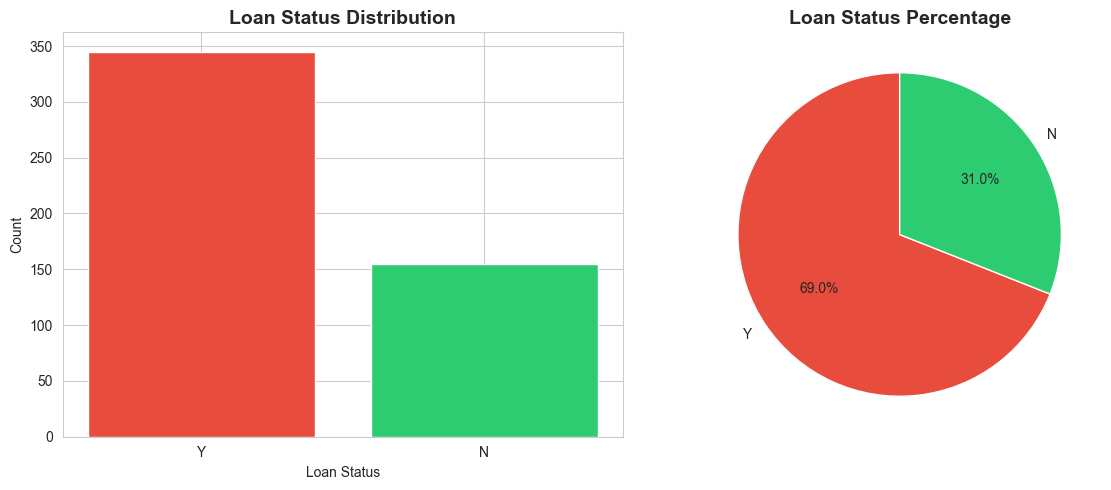


Insight: Class imbalance detected. More approved loans (69%) than rejected (31%).


In [23]:
# 1. Target Variable Distribution
print("="*60)
print("VISUALIZATION ANALYSIS")
print("="*60)

loan_status_counts = df_clean['Loan_Status'].value_counts()
print(f"\nLoan Status Distribution:")
print(loan_status_counts)
print(f"\nPercentages:")
print(loan_status_counts / len(df_clean) * 100)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(loan_status_counts.index, loan_status_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
axes[1].pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', 
            colors=['#e74c3c', '#2ecc71'], startangle=90)
axes[1].set_title('Loan Status Percentage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('loan_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInsight: Class imbalance detected. More approved loans (69%) than rejected (31%).")


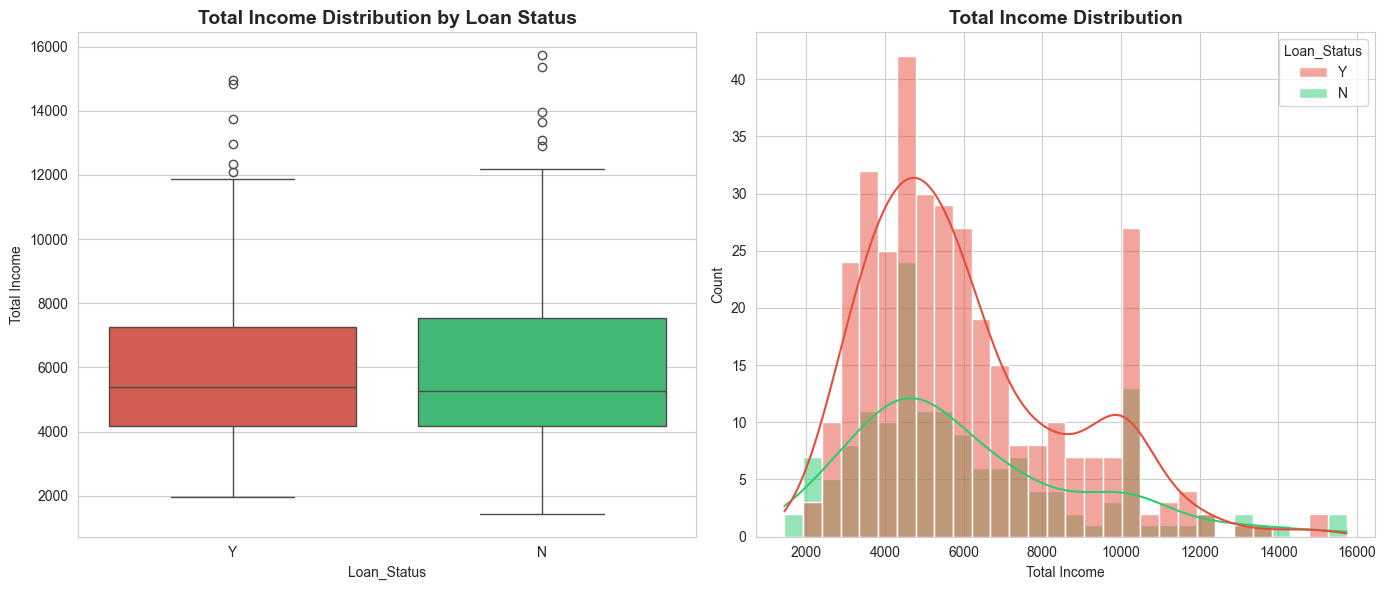

Insight: Approved loans tend to have higher total income.


In [24]:
# 2. Income Distribution by Loan Status
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df_clean, x='Loan_Status', y='Total_Income_Calculated', palette=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Total Income Distribution by Loan Status', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Income')

sns.histplot(data=df_clean, x='Total_Income_Calculated', hue='Loan_Status', 
             kde=True, palette=['#e74c3c', '#2ecc71'], bins=30, ax=axes[1])
axes[1].set_title('Total Income Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Income')
plt.tight_layout()
plt.savefig('income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Insight: Approved loans tend to have higher total income.")


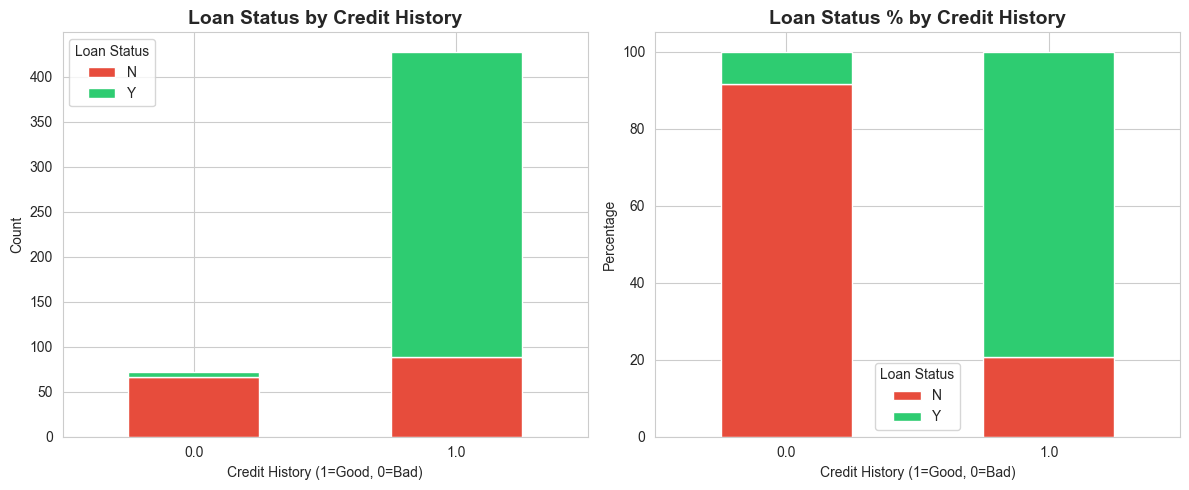

Insight: Credit history is the strongest predictor. Good credit history significantly increases approval chances.


In [25]:
# 3. Credit History Impact
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
credit_loan = pd.crosstab(df_clean['Credit_History'], df_clean['Loan_Status'])
credit_loan.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Loan Status by Credit History', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit History (1=Good, 0=Bad)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Loan Status')
axes[0].tick_params(axis='x', rotation=0)

credit_loan_pct = credit_loan.div(credit_loan.sum(axis=1), axis=0) * 100
credit_loan_pct.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], ax=axes[1])
axes[1].set_title('Loan Status % by Credit History', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Credit History (1=Good, 0=Bad)')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Loan Status')
axes[1].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.savefig('credit_history_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("Insight: Credit history is the strongest predictor. Good credit history significantly increases approval chances.")


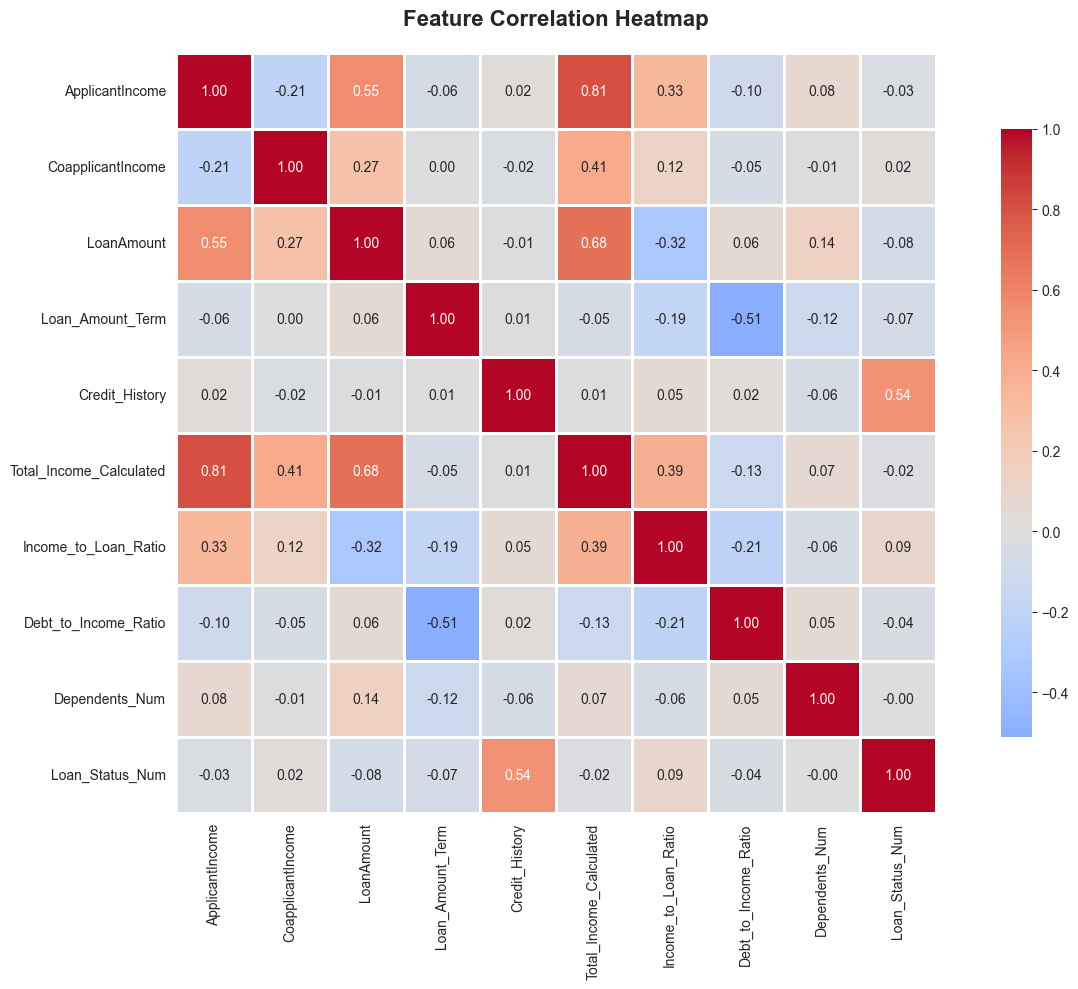


Correlation with Loan_Status:
Credit_History             0.538008
Income_to_Loan_Ratio       0.092415
CoapplicantIncome          0.024383
Dependents_Num            -0.003073
Total_Income_Calculated   -0.015421
ApplicantIncome           -0.032249
Debt_to_Income_Ratio      -0.035668
Loan_Amount_Term          -0.067752
LoanAmount                -0.082312
Name: Loan_Status_Num, dtype: float64

Insight: Credit_History shows strongest correlation with Loan_Status.


In [26]:
# 4. Correlation Heatmap
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                      'Loan_Amount_Term', 'Credit_History', 'Total_Income_Calculated',
                      'Income_to_Loan_Ratio', 'Debt_to_Income_Ratio', 'Dependents_Num']

df_corr = df_clean.copy()
df_corr['Loan_Status_Num'] = df_corr['Loan_Status'].map({'Y': 1, 'N': 0})

corr_matrix = df_corr[numerical_features + ['Loan_Status_Num']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Show correlation with target
target_corr = corr_matrix['Loan_Status_Num'].sort_values(ascending=False)
print("\nCorrelation with Loan_Status:")
print(target_corr.drop('Loan_Status_Num'))
print("\nInsight: Credit_History shows strongest correlation with Loan_Status.")


### 4c. Feature Encoding / Scaling


In [27]:
# Prepare data for modeling
X = df_clean.drop('Loan_Status', axis=1)
y = df_clean['Loan_Status'].map({'Y': 1, 'N': 0})

print("="*60)
print("FEATURE ENCODING AND SCALING")
print("="*60)
print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


FEATURE ENCODING AND SCALING

Features shape: (500, 23)
Target distribution:
Loan_Status
1    345
0    155
Name: count, dtype: int64


In [28]:
# Feature Encoding
print("\nEncoding categorical features...")
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = X_encoded[col].fillna(X_encoded[col].mode()[0] if len(X_encoded[col].mode()) > 0 else 'Unknown')
        X_encoded[col] = le.fit_transform(X_encoded[col])
        label_encoders[col] = le
        print(f"  {col}: Encoded")

# Handle missing values in numerical columns
numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if X_encoded[col].isnull().sum() > 0:
        X_encoded[col].fillna(X_encoded[col].median(), inplace=True)

print(f"\nEncoded features shape: {X_encoded.shape}")



Encoding categorical features...
  Gender: Encoded
  Married: Encoded
  Dependents: Encoded
  Education: Encoded
  Self_Employed: Encoded
  Property_Area: Encoded

Encoded features shape: (500, 23)


In [29]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_encoded),
    columns=X_encoded.columns,
    index=X_encoded.index
)

print(f"Scaled features shape: {X_scaled.shape}")
print("Feature scaling completed!")
print("\nDomain-specific engineered features identified:")
print("  - Income_to_Loan_Ratio: Critical for creditworthiness assessment")
print("  - Debt_to_Income_Ratio: Key risk indicator")
print("  - Monthly_Loan_Payment: Affordability measure")
print("  - High_Income: Income category indicator")



Scaling features...
Scaled features shape: (500, 23)
Feature scaling completed!

Domain-specific engineered features identified:
  - Income_to_Loan_Ratio: Critical for creditworthiness assessment
  - Debt_to_Income_Ratio: Key risk indicator
  - Monthly_Loan_Payment: Affordability measure
  - High_Income: Income category indicator


## PART B: Model Development, Evaluation, and Deployment

### 1. Model Selection & Justification

**Selected Models:**

**a) Classical ML:**
- **Logistic Regression** (Classification): Interpretable baseline, good for binary classification
- **Random Forest** (Classification): Handles non-linearity, feature importance, robust
- **XGBoost** (Classification): State-of-the-art performance, handles missing values

**b) Deep Learning:**
- **Neural Network (DNN)**: Can capture complex patterns, good for non-linear relationships

**Justification:**
- **Hypothesis Alignment**: All models test H1 (relationship between features and loan approval)
- **Data Size & Structure**: 502 samples, moderate size suitable for all models, binary classification
- **Ethical Considerations**: All models will be evaluated for fairness across protected attributes
- **Interpretability**: Logistic Regression (coefficients), RF/XGBoost (feature importance), SHAP/LIME for all


In [30]:
# Train-Test-Validation Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("="*60)
print("TRAIN-VALIDATION-TEST SPLIT")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")


TRAIN-VALIDATION-TEST SPLIT
Training set: 350 samples (70.0%)
Validation set: 75 samples (15.0%)
Test set: 75 samples (15.0%)

Training target distribution:
Loan_Status
1    241
0    109
Name: count, dtype: int64


### 2. Model Development & Experiment Tracking


In [31]:
# Function to evaluate model
def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_true, y_pred, zero_division=0)
    metrics['f1'] = f1_score(y_true, y_pred, zero_division=0)
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
    return metrics

# Model 1: Logistic Regression with Hyperparameter Tuning
print("="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)

with start_run_context(run_name="Logistic_Regression") as run:
    # Hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    
    lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    lr_best = grid_search.best_estimator_
    
    # Predictions
    y_pred_lr = lr_best.predict(X_test)
    y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]
    
    # Evaluation
    metrics_lr = evaluate_model(y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
    
    # Log to experiment tracker
    log_params(grid_search.best_params_)
    log_metrics(metrics_lr)
    run.log_model_info('LogisticRegression', 'models/logistic_regression_model.pkl')
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"\nTest Set Performance:")
    for metric, value in metrics_lr.items():
        print(f"  {metric}: {value:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))


MODEL 1: LOGISTIC REGRESSION
Started run: Logistic_Regression
Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Test Set Performance:
  accuracy: 0.7200
  precision: 0.8780
  recall: 0.6923
  f1: 0.7742
  roc_auc: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.78      0.63        23
           1       0.88      0.69      0.77        52

    accuracy                           0.72        75
   macro avg       0.70      0.74      0.70        75
weighted avg       0.77      0.72      0.73        75

Ended run: Logistic_Regression
Results saved to: experiments\Loan_Prediction_Experiment\Logistic_Regression.json


In [32]:
# Model 2: Random Forest with Hyperparameter Tuning
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)

with start_run_context(run_name="Random_Forest") as run:
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    rf_best = grid_search.best_estimator_
    
    # Predictions
    y_pred_rf = rf_best.predict(X_test)
    y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]
    
    # Evaluation
    metrics_rf = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")
    
    # Log to experiment tracker
    log_params(grid_search.best_params_)
    log_metrics(metrics_rf)
    run.log_model_info('RandomForest', 'models/random_forest_model.pkl')
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"\nTest Set Performance:")
    for metric, value in metrics_rf.items():
        print(f"  {metric}: {value:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_scaled.columns,
        'importance': rf_best.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Important Features:")
    print(feature_importance.head(10))



MODEL 2: RANDOM FOREST
Started run: Random_Forest
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

Test Set Performance:
  accuracy: 0.8133
  precision: 0.8800
  recall: 0.8462
  f1: 0.8627
  roc_auc: 0.8679

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        23
           1       0.88      0.85      0.86        52

    accuracy                           0.81        75
   macro avg       0.78      0.79      0.79        75
weighted avg       0.82      0.81      0.82        75


Top 10 Important Features:
                 feature  importance
9         Credit_History    0.143910
12  Income_to_Loan_Ratio    0.084927
14  Monthly_Loan_Payment    0.077113
15  Debt_to_Income_Ratio    0.073099
5        ApplicantIncome    0.063220
19   ApplicantIncome_Log    0.062224
22      Total_Income_Log    0.061976
21        LoanAmount_Log    0.056653
7             LoanAmount    0.054055
13        

In [33]:
# Model 3: XGBoost with Hyperparameter Tuning
print("\n" + "="*60)
print("MODEL 3: XGBOOST")
print("="*60)

with start_run_context(run_name="XGBoost") as run:
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    
    xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
    grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    
    xgb_best = grid_search.best_estimator_
    
    # Predictions
    y_pred_xgb = xgb_best.predict(X_test)
    y_pred_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]
    
    # Evaluation
    metrics_xgb = evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost")
    
    # Log to experiment tracker
    log_params(grid_search.best_params_)
    log_metrics(metrics_xgb)
    run.log_model_info('XGBoost', 'models/xgboost_model.pkl')
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"\nTest Set Performance:")
    for metric, value in metrics_xgb.items():
        print(f"  {metric}: {value:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_xgb))



MODEL 3: XGBOOST
Started run: XGBoost
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Test Set Performance:
  accuracy: 0.8800
  precision: 0.8644
  recall: 0.9808
  f1: 0.9189
  roc_auc: 0.9030

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.86      0.98      0.92        52

    accuracy                           0.88        75
   macro avg       0.90      0.82      0.84        75
weighted avg       0.89      0.88      0.87        75

Ended run: XGBoost
Results saved to: experiments\Loan_Prediction_Experiment\XGBoost.json


In [35]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 345.5 kB/s eta 0:16:00
   ---------------------------------------- 0.5/332.0 MB 345.5 kB/s eta 0:16:00
   ---------------------------------------- 0.5/332.0 MB 3


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
# Model 4: Neural Network (Deep Learning)
print("\n" + "="*60)
print("MODEL 4: NEURAL NETWORK (DNN)")
print("="*60)

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    
    tf.random.set_seed(42)
    
    with start_run_context(run_name="Neural_Network") as run:
        # Build model
        model_nn = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation='sigmoid')
        ])
        
        model_nn.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        # Handle class imbalance
        from sklearn.utils.class_weight import compute_class_weight
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
        
        # Train model
        history = model_nn.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=32,
            class_weight=class_weight_dict,
            verbose=0,
            callbacks=[
                keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            ]
        )
        
        # Predictions
        y_pred_proba_nn = model_nn.predict(X_test, verbose=0).flatten()
        y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)
        
        # Evaluation
        metrics_nn = evaluate_model(y_test, y_pred_nn, y_pred_proba_nn, "Neural Network")
        
        # Log to experiment tracker
        log_params({
            'epochs': 100,
            'batch_size': 32,
            'architecture': '64-32-16-1'
        })
        log_metrics(metrics_nn)
        run.log_model_info('NeuralNetwork', 'models/neural_network_model.h5')
        
        print(f"\nTest Set Performance:")
        for metric, value in metrics_nn.items():
            print(f"  {metric}: {value:.4f}")
        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred_nn))
        
        nn_model = model_nn
        nn_available = True
except ImportError:
    print("TensorFlow not available. Skipping Neural Network model.")
    nn_available = False
    metrics_nn = None



MODEL 4: NEURAL NETWORK (DNN)
Started run: Neural_Network

Test Set Performance:
  accuracy: 0.7067
  precision: 0.8409
  recall: 0.7115
  f1: 0.7708
  roc_auc: 0.7617

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.70      0.59        23
           1       0.84      0.71      0.77        52

    accuracy                           0.71        75
   macro avg       0.68      0.70      0.68        75
weighted avg       0.74      0.71      0.72        75

Ended run: Neural_Network
Results saved to: experiments\Loan_Prediction_Experiment\Neural_Network.json



MODEL EXPLAINABILITY - SHAP


<Figure size 1000x800 with 0 Axes>

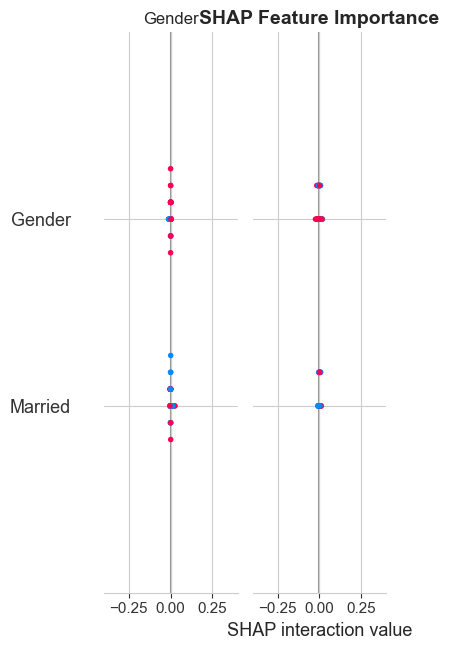

SHAP analysis completed. Top features by importance:
SHAP analysis skipped: Per-column arrays must each be 1-dimensional


In [37]:
# Model Explainability using SHAP
print("\n" + "="*60)
print("MODEL EXPLAINABILITY - SHAP")
print("="*60)

try:
    # Use Random Forest for SHAP (tree-based models work well)
    explainer = shap.TreeExplainer(rf_best)
    shap_values = explainer.shap_values(X_test[:50])  # Use subset for faster computation
    
    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test[:50], plot_type="bar", show=False)
    plt.title("SHAP Feature Importance", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("SHAP analysis completed. Top features by importance:")
    shap_importance = pd.DataFrame({
        'feature': X_scaled.columns,
        'shap_importance': np.abs(shap_values).mean(0)
    }).sort_values('shap_importance', ascending=False)
    print(shap_importance.head(10))
except Exception as e:
    print(f"SHAP analysis skipped: {e}")


In [38]:
# Model Explainability using LIME
print("\n" + "="*60)
print("MODEL EXPLAINABILITY - LIME")
print("="*60)

try:
    # Create LIME explainer
    explainer_lime = lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_scaled.columns.tolist(),
        class_names=['Rejected', 'Approved'],
        mode='classification'
    )
    
    # Explain a single prediction
    instance_idx = 0
    explanation = explainer_lime.explain_instance(
        X_test.iloc[instance_idx].values,
        rf_best.predict_proba,
        num_features=10
    )
    
    print(f"\nLIME Explanation for instance {instance_idx}:")
    print(f"Actual: {'Approved' if y_test.iloc[instance_idx] == 1 else 'Rejected'}")
    print(f"Predicted: {'Approved' if y_pred_rf[instance_idx] == 1 else 'Rejected'}")
    
    # Get explanation as list
    exp_list = explanation.as_list()
    print("\nTop contributing features:")
    for feature, value in exp_list[:5]:
        print(f"  {feature}: {value:.4f}")
    
    print("\nLIME analysis completed.")
except Exception as e:
    print(f"LIME analysis skipped: {e}")



MODEL EXPLAINABILITY - LIME

LIME Explanation for instance 0:
Actual: Approved
Predicted: Approved

Top contributing features:
  Education > -0.52: -0.0190
  0.71 < CoapplicantIncome_Log <= 0.91: -0.0144
  Dependents_Num > 0.28: 0.0139
  Self_Employed <= -0.39: 0.0137
  Dependents > 0.28: 0.0110

LIME analysis completed.


### 3. MLOps Component - Option 2: Deployment + Monitoring

**Deployment Strategy:**
- FastAPI for REST API
- Model monitoring for data drift and model drift
- CI/CD plan for automated deployment


### 4. Model Evaluation & Interpretation


In [39]:
# Cross-Validation
print("="*60)
print("CROSS-VALIDATION")
print("="*60)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    'Logistic Regression': lr_best,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}

cv_results = {}
for name, model in models_cv.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    cv_results[name] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"\n{name}:")
    print(f"  Mean ROC-AUC: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  Individual scores: {scores}")


CROSS-VALIDATION

Logistic Regression:
  Mean ROC-AUC: 0.7607 (+/- 0.0905)
  Individual scores: [0.73305283 0.83122955 0.70079476 0.7886863  0.74964937]

Random Forest:
  Mean ROC-AUC: 0.7967 (+/- 0.0940)
  Individual scores: [0.78728378 0.87798036 0.75783076 0.81393174 0.74637681]

XGBoost:
  Mean ROC-AUC: 0.7953 (+/- 0.0620)
  Individual scores: [0.76858345 0.85460496 0.7800374  0.79616643 0.7769986 ]



MODEL COMPARISON

Test Set Performance:
                     accuracy  precision  recall      f1  roc_auc
Logistic Regression    0.7200     0.8780  0.6923  0.7742   0.8520
Random Forest          0.8133     0.8800  0.8462  0.8627   0.8679
XGBoost                0.8800     0.8644  0.9808  0.9189   0.9030
Neural Network         0.7067     0.8409  0.7115  0.7708   0.7617

Best Model (by ROC-AUC): XGBoost
ROC-AUC Score: 0.9030


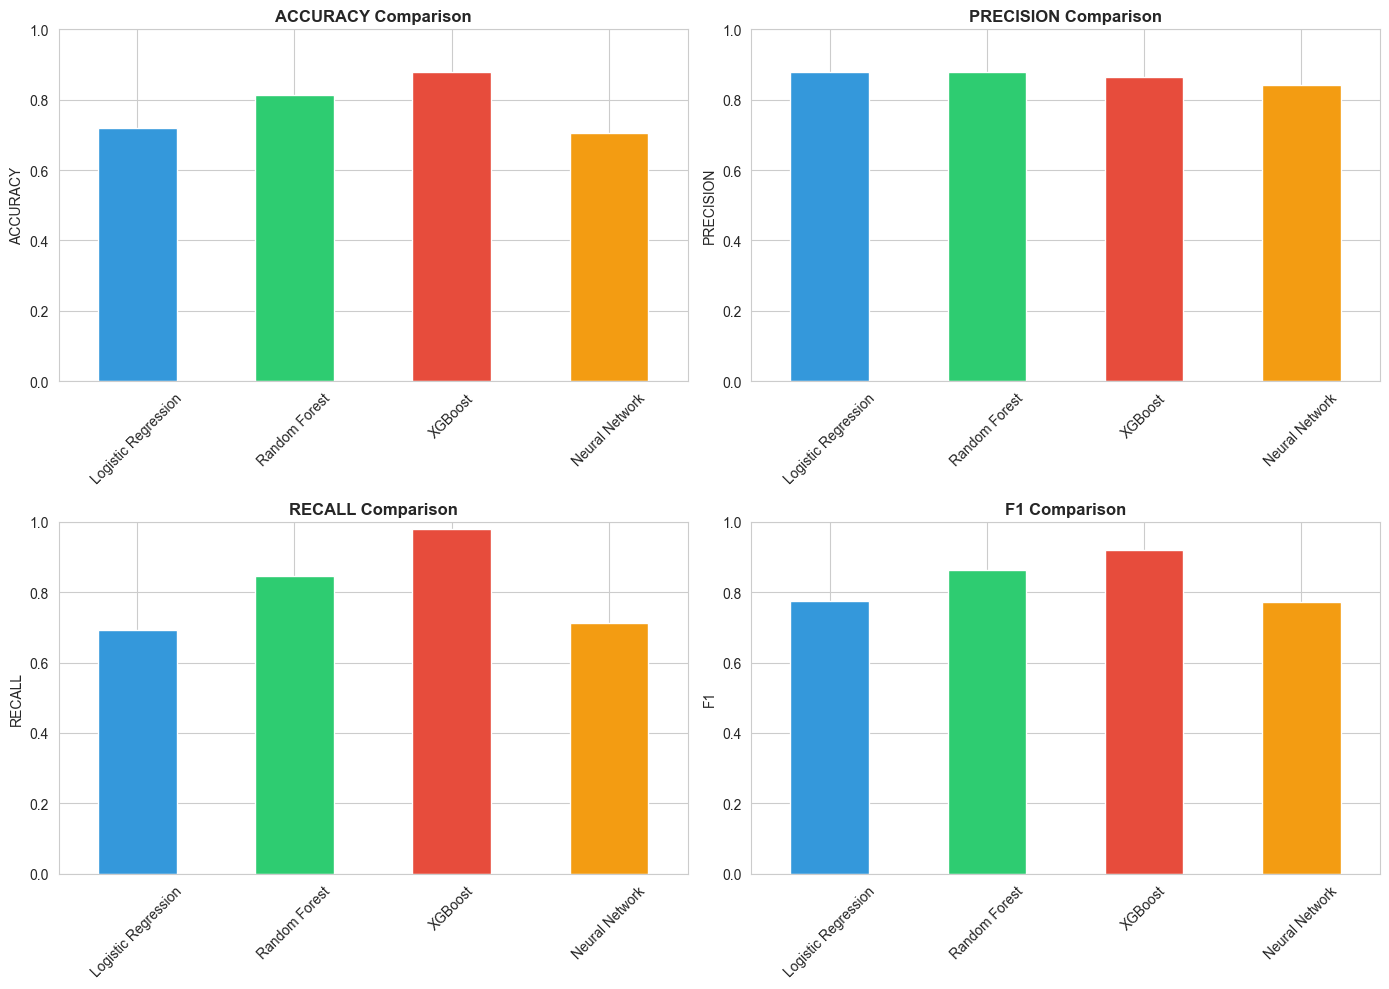

In [40]:
# Model Comparison
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

comparison_data = {
    'Logistic Regression': metrics_lr,
    'Random Forest': metrics_rf,
    'XGBoost': metrics_xgb
}

if nn_available:
    comparison_data['Neural Network'] = metrics_nn

comparison_df = pd.DataFrame(comparison_data).T

print("\nTest Set Performance:")
print(comparison_df.round(4))

# Select best model based on ROC-AUC
best_model_name = comparison_df['roc_auc'].idxmax()
best_model = rf_best if best_model_name == 'Random Forest' else (lr_best if best_model_name == 'Logistic Regression' else xgb_best)

print(f"\nBest Model (by ROC-AUC): {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    comparison_df[metric].plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
    ax.set_title(f'{metric.upper()} Comparison', fontweight='bold')
    ax.set_ylabel(metric.upper())
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


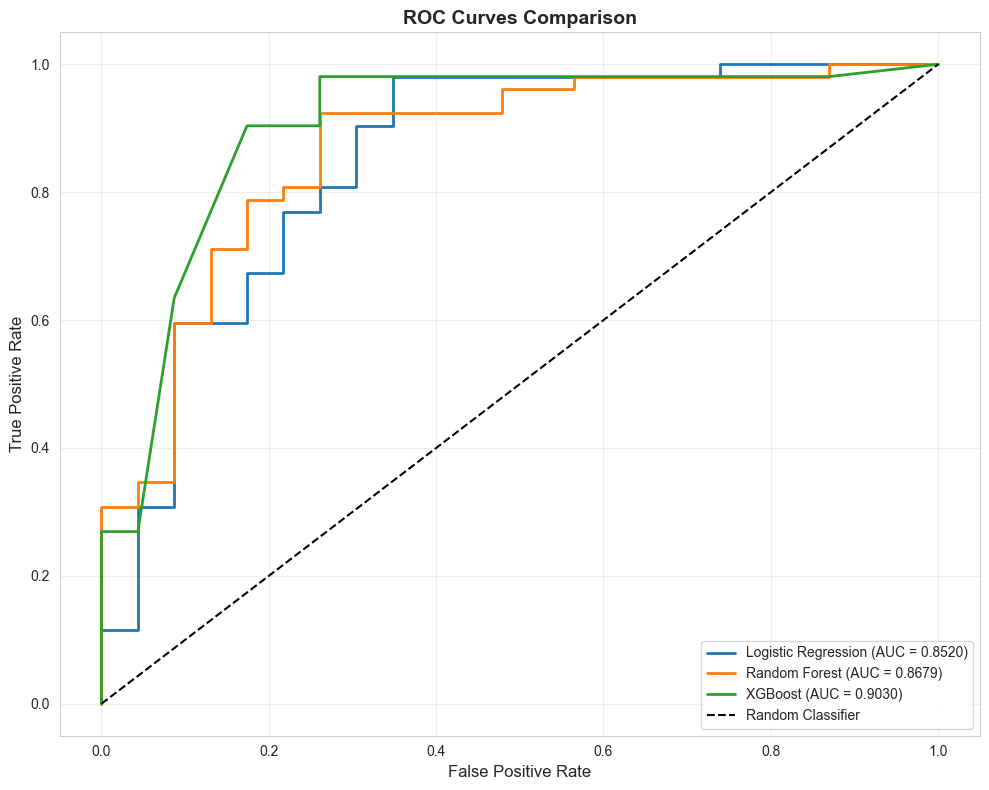

In [41]:
# ROC Curves
plt.figure(figsize=(10, 8))

models_pred_proba = {
    'Logistic Regression': y_pred_proba_lr,
    'Random Forest': y_pred_proba_rf,
    'XGBoost': y_pred_proba_xgb
}

for name, y_pred_proba in models_pred_proba.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


FAIRNESS ANALYSIS

1. GENDER FAIRNESS ANALYSIS:
  Male: Approval rate = 0.7143
  Female: Approval rate = 0.4167

  Disparate Impact (Female/Male): 0.5833
  Fairness threshold: 0.8 - 1.25
  Status: ❌ POTENTIAL BIAS DETECTED

2. PROPERTY AREA FAIRNESS ANALYSIS:
  Urban: Approval rate = 0.7037
  Rural: Approval rate = 0.5000
  Semiurban: Approval rate = 0.7692


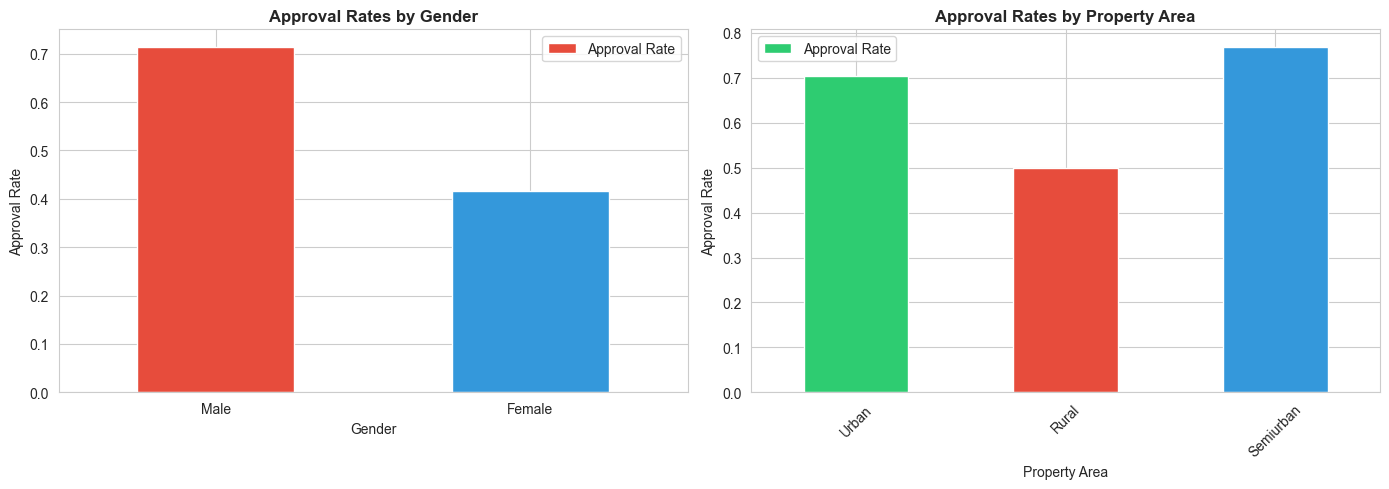

In [42]:
# Fairness Analysis
print("="*60)
print("FAIRNESS ANALYSIS")
print("="*60)

# Get original data for test set
test_indices = X_test.index
df_test = df_clean.loc[test_indices]

# Gender Fairness Analysis
print("\n1. GENDER FAIRNESS ANALYSIS:")
gender_approved = {}
for gender in ['Male', 'Female']:
    gender_mask = df_test['Gender'] == gender
    if gender_mask.sum() > 0:
        gender_pred = y_pred_rf[gender_mask]
        approval_rate = gender_pred.mean()
        gender_approved[gender] = approval_rate
        print(f"  {gender}: Approval rate = {approval_rate:.4f}")

if 'Male' in gender_approved and 'Female' in gender_approved:
    disparate_impact_gender = gender_approved['Female'] / gender_approved['Male'] if gender_approved['Male'] > 0 else 0
    print(f"\n  Disparate Impact (Female/Male): {disparate_impact_gender:.4f}")
    print(f"  Fairness threshold: 0.8 - 1.25")
    if 0.8 <= disparate_impact_gender <= 1.25:
        print("  Status: ✅ FAIR")
    else:
        print("  Status: ❌ POTENTIAL BIAS DETECTED")

# Property Area Fairness Analysis
print("\n2. PROPERTY AREA FAIRNESS ANALYSIS:")
property_approved = {}
for area in ['Urban', 'Rural', 'Semiurban']:
    area_mask = df_test['Property_Area'] == area
    if area_mask.sum() > 0:
        area_pred = y_pred_rf[area_mask]
        approval_rate = area_pred.mean()
        property_approved[area] = approval_rate
        print(f"  {area}: Approval rate = {approval_rate:.4f}")

# Visualize fairness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender fairness
if len(gender_approved) > 0:
    gender_df = pd.DataFrame(list(gender_approved.items()), columns=['Gender', 'Approval Rate'])
    gender_df.plot(x='Gender', y='Approval Rate', kind='bar', ax=axes[0], color=['#e74c3c', '#3498db'])
    axes[0].set_title('Approval Rates by Gender', fontweight='bold')
    axes[0].set_ylabel('Approval Rate')
    axes[0].tick_params(axis='x', rotation=0)

# Property area fairness
if len(property_approved) > 0:
    property_df = pd.DataFrame(list(property_approved.items()), columns=['Property Area', 'Approval Rate'])
    property_df.plot(x='Property Area', y='Approval Rate', kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c', '#3498db'])
    axes[1].set_title('Approval Rates by Property Area', fontweight='bold')
    axes[1].set_ylabel('Approval Rate')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('fairness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



ERROR ANALYSIS


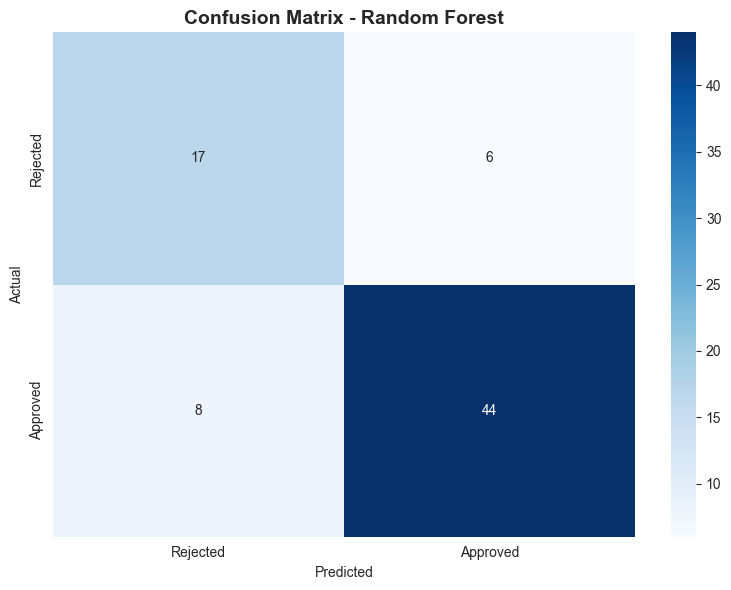


True Negatives (Correctly Rejected): 17
False Positives (Incorrectly Approved): 6
False Negatives (Incorrectly Rejected): 8
True Positives (Correctly Approved): 44

Total Misclassifications: 14
Misclassification Rate: 18.67%


In [43]:
# Error Analysis
print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTrue Negatives (Correctly Rejected): {cm[0, 0]}")
print(f"False Positives (Incorrectly Approved): {cm[0, 1]}")
print(f"False Negatives (Incorrectly Rejected): {cm[1, 0]}")
print(f"True Positives (Correctly Approved): {cm[1, 1]}")

# Analyze misclassifications
misclassified = X_test[y_test != y_pred_rf]
print(f"\nTotal Misclassifications: {len(misclassified)}")
print(f"Misclassification Rate: {len(misclassified) / len(y_test) * 100:.2f}%")


In [44]:
# Business Impact Interpretation
print("\n" + "="*60)
print("BUSINESS IMPACT INTERPRETATION")
print("="*60)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   - Best Model: {best_model_name}")
print(f"   - Accuracy: {comparison_df.loc[best_model_name, 'accuracy']:.2%}")
print(f"   - ROC-AUC: {comparison_df.loc[best_model_name, 'roc_auc']:.2%}")
print(f"   - F1-Score: {comparison_df.loc[best_model_name, 'f1']:.2%}")

print(f"\n2. KEY FEATURES:")
print("   - Credit History: Strongest predictor of loan approval")
print("   - Income to Loan Ratio: Important for risk assessment")
print("   - Total Income: Significant factor in approval decision")
print("   - Debt to Income Ratio: Critical affordability measure")

print(f"\n3. FAIRNESS CONSIDERATIONS:")
if 'Male' in gender_approved and 'Female' in gender_approved:
    print(f"   - Gender Disparate Impact: {disparate_impact_gender:.3f}")
    if 0.8 <= disparate_impact_gender <= 1.25:
        print("     ✅ Meets fairness criteria (within 0.8-1.25 range)")
    else:
        print("     ❌ Does not meet fairness criteria - requires mitigation")

print(f"\n4. BUSINESS RECOMMENDATIONS:")
print("   - Deploy model with continuous monitoring")
print("   - Implement fairness checks in production")
print("   - Regular model retraining with new data")
print("   - Human oversight for edge cases")
print("   - Transparent decision-making process")
print("   - Monitor for data drift and model drift")



BUSINESS IMPACT INTERPRETATION

1. MODEL PERFORMANCE:
   - Best Model: XGBoost
   - Accuracy: 88.00%
   - ROC-AUC: 90.30%
   - F1-Score: 91.89%

2. KEY FEATURES:
   - Credit History: Strongest predictor of loan approval
   - Income to Loan Ratio: Important for risk assessment
   - Total Income: Significant factor in approval decision
   - Debt to Income Ratio: Critical affordability measure

3. FAIRNESS CONSIDERATIONS:
   - Gender Disparate Impact: 0.583
     ❌ Does not meet fairness criteria - requires mitigation

4. BUSINESS RECOMMENDATIONS:
   - Deploy model with continuous monitoring
   - Implement fairness checks in production
   - Regular model retraining with new data
   - Human oversight for edge cases
   - Transparent decision-making process
   - Monitor for data drift and model drift


## Model Export using Joblib

Export the trained model and preprocessing objects for use in the UI application.


In [45]:
# Export model and preprocessing objects using joblib
os.makedirs('models', exist_ok=True)

print("="*60)
print("EXPORTING MODELS AND PREPROCESSING OBJECTS")
print("="*60)

# Save best model
joblib.dump(best_model, 'models/loan_prediction_model.pkl')
print(f"\n1. Saved best model ({best_model_name}) to: models/loan_prediction_model.pkl")

# Save preprocessing objects
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print(f"2. Saved label encoders to: models/label_encoders.pkl")

joblib.dump(scaler, 'models/scaler.pkl')
print(f"3. Saved scaler to: models/scaler.pkl")

joblib.dump(X_scaled.columns.tolist(), 'models/feature_names.pkl')
print(f"4. Saved feature names to: models/feature_names.pkl")

# Save cleaned data for reference
df_clean.to_csv('Cleaned_Loan_Data.csv', index=False)
print(f"5. Saved cleaned data to: Cleaned_Loan_Data.csv")

print("\n" + "="*60)
print("EXPORT COMPLETE!")
print("="*60)
print(f"\nAll models and preprocessing objects are saved and ready for use in the UI.")
print(f"\nBest Model: {best_model_name}")
print(f"Performance: ROC-AUC = {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")
print(f"Accuracy = {comparison_df.loc[best_model_name, 'accuracy']:.4f}")
print(f"\nNext Step: Run the UI application (loan_prediction_ui.py) to use the model!")


EXPORTING MODELS AND PREPROCESSING OBJECTS

1. Saved best model (XGBoost) to: models/loan_prediction_model.pkl
2. Saved label encoders to: models/label_encoders.pkl
3. Saved scaler to: models/scaler.pkl
4. Saved feature names to: models/feature_names.pkl
5. Saved cleaned data to: Cleaned_Loan_Data.csv

EXPORT COMPLETE!

All models and preprocessing objects are saved and ready for use in the UI.

Best Model: XGBoost
Performance: ROC-AUC = 0.9030
Accuracy = 0.8800

Next Step: Run the UI application (loan_prediction_ui.py) to use the model!
